In [12]:
import pickle
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
group_id = "check_by_them_test_2"

# load result
result_files = glob.glob(f"./results/{group_id}/*.pickle")
results = []
for file in result_files:
    with open(file, "rb") as f:
        results.append(pickle.load(f))

# create plots folder
os.makedirs(f"./plots/{group_id}/", exist_ok=True)

In [14]:
# make results into dataframe
df_columns = ["model", "label", "accuracy", "precision", "TP", "TN", "FP", "FN", "n_samples", "n_trials", "model"]
df_data = []
time_elapsed = 0
ex_id = ""
for r in results:
    args = r["args"]
    n_trials = args.n_trials
    max_retry = args.max_retry
    model = args.model
    for trial in r["result"]:
        for sample in trial:
            df_data.append([
                model,
                sample["class label"],
                sample["accuracy"],
                sample["precision"],
                sample["TP"],
                sample["TN"],
                sample["FP"],
                sample["FN"],
                sample["n_samples"],
                n_trials,
                model,
            ])
    time_elapsed = int(r["finish_time"]) - int(r["start_time"])
    ex_id = r["experiment_id"]
df_results = pd.DataFrame(df_data, columns=df_columns)
print("time elapsed: ", time_elapsed)
print("experiment id: ", ex_id)
df_results

time elapsed:  625
experiment id:  905c0a3f06e5c8dbed8c731ad086e0a5


,model,label,accuracy,precision,TP,TN,FP,FN,n_samples,n_trials,model
0,gpt-3.5-turbo,Company,0.0,0.0,0,0,5,5,5,1,gpt-3.5-turbo
1,gpt-3.5-turbo,EducationalInstitution,0.0,0.0,0,0,5,5,5,1,gpt-3.5-turbo
2,gpt-3.5-turbo,Artist,0.0,0.0,0,0,5,5,5,1,gpt-3.5-turbo
3,gpt-3.5-turbo,Athlete,0.0,0.0,0,0,5,5,5,1,gpt-3.5-turbo
4,gpt-3.5-turbo,OfficeHolder,0.0,0.0,0,0,5,5,5,1,gpt-3.5-turbo
5,gpt-3.5-turbo,MeanOfTransportation,0.0,0.0,0,0,5,5,5,1,gpt-3.5-turbo
6,gpt-3.5-turbo,Building,0.0,0.0,0,0,5,5,5,1,gpt-3.5-turbo
7,gpt-3.5-turbo,NaturalPlace,0.0,0.0,0,0,5,5,5,1,gpt-3.5-turbo
8,gpt-3.5-turbo,Village,0.0,0.0,0,0,5,5,5,1,gpt-3.5-turbo
9,gpt-3.5-turbo,Animal,0.0,0.0,0,0,5,5,5,1,gpt-3.5-turbo


In [15]:
# group by n_sample
res_g_sample = df_results.groupby(by=["label","n_samples"], as_index=False).mean("precision", "accuracy")
res_g_sample

,label,n_samples,accuracy,precision,TP,TN,FP,FN,n_trials
0,Album,5,0.0,0.0,0.0,0.0,5.0,5.0,1.0
1,Album,10,0.0,0.0,0.0,0.0,10.0,10.0,1.0
2,Animal,5,0.0,0.0,0.0,0.0,5.0,5.0,1.0
3,Animal,10,0.0,0.0,0.0,0.0,10.0,10.0,1.0
4,Artist,5,0.0,0.0,0.0,0.0,5.0,5.0,1.0
5,Artist,10,0.0,0.0,0.0,0.0,10.0,10.0,1.0
6,Athlete,5,0.0,0.0,0.0,0.0,5.0,5.0,1.0
7,Athlete,10,0.0,0.0,0.0,0.0,10.0,10.0,1.0
8,Building,5,0.0,0.0,0.0,0.0,5.0,5.0,1.0
9,Building,10,0.0,0.0,0.0,0.0,10.0,10.0,1.0


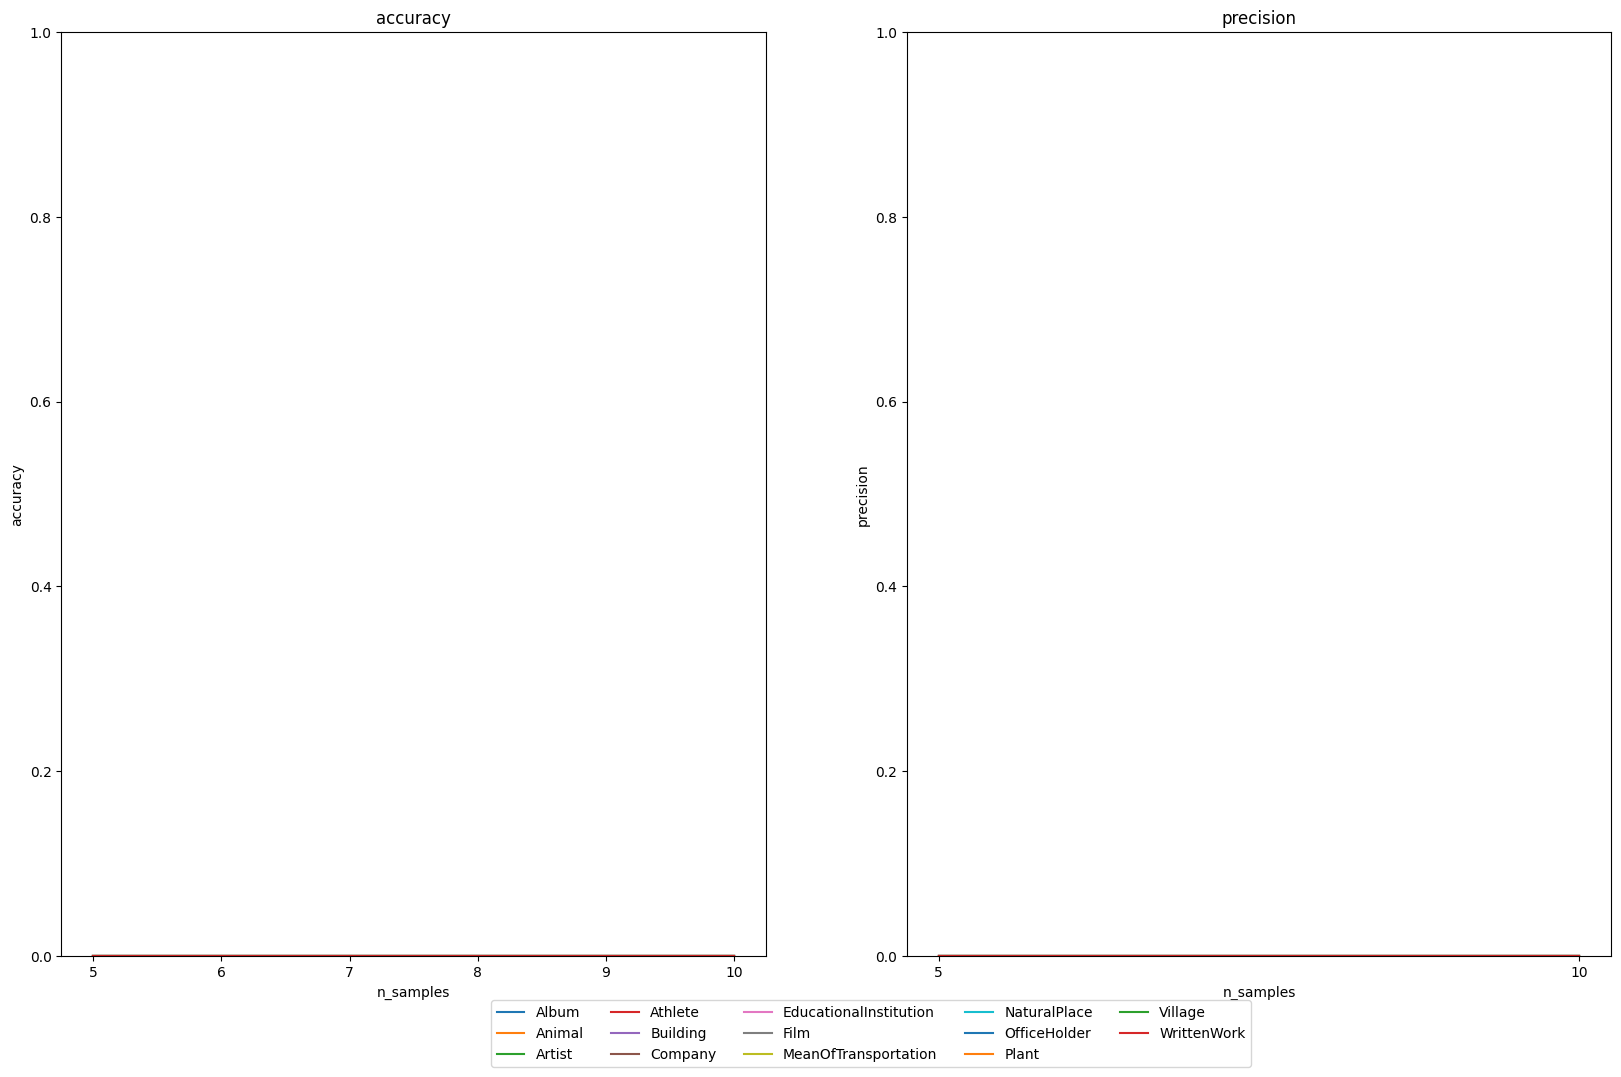

In [16]:
# plot accuracy and precision with df_results
# x axis: label
# y axis: accuracy/precision (average of all trials)
# group by n_sample

# plot
plt.figure(figsize=(20, 12))
# plt.title(f"{model} - dbpedia_14 dataset - {group_id}")
# plt.xlabel("n_samples")
# plt.ylim(0, 1)

sub_acc = plt.subplot(1, 2, 1)
sub_acc.set_title("accuracy")
sub_acc.set_xlabel("n_samples")
sub_acc.set_ylabel("accuracy")
sub_acc.set_ylim(0, 1)

sub_prec = plt.subplot(1, 2, 2)
sub_prec.set_title("precision")
sub_prec.set_xlabel("n_samples")
sub_prec.set_ylabel("precision")
sub_prec.set_ylim(0, 1)

labels = []
# get average of accuracy and precision for each label group by n_sample
for l, klass in res_g_sample.groupby(by="label"):
    precs_by_n_sample = []
    accs_by_n_sample = []
    n_list = []
    for n_sample, data in klass.groupby(by="n_samples"):
        n_list.append(n_sample)
        precs_by_n_sample.append(data["precision"].mean())
        accs_by_n_sample.append(data["accuracy"].mean())
    sub_prec.plot(n_list, precs_by_n_sample, label=l)
    sub_acc.plot(n_list, accs_by_n_sample, label=l)
    plt.xticks(n_list)
    labels.append(l)
plt.legend(labels, loc="upper left", bbox_to_anchor=(-0.6, -0.04), ncol=5) 

# save images
plt.savefig(f"./plots/{group_id}/dbpedia_14_{ex_id}.png")
